In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import binom, norm

In [11]:
y = np.array([21,20,15]) # number of yes
n = np.array([48,34,21]) # total
Z = np.array([10,30,50]) # NO2 concentration

data_air = np.zeros((3,3))
data_air[:,0] = y
data_air[:,1] = n
data_air[:,2] = Z

alpha = 4.48
beta = 0.76

# creation of x 
x = np.array([alpha + beta*Z[i] + np.random.normal(0,np.sqrt(81.14)) for i in np.arange(0,3)])

In [7]:
# Function for log likelihood
def log_likelihood(theta, x, n, y):
    theta = 1 / (1 + np.exp(-(theta[0] + theta[1]*x)))
    return np.sum(binom.logpmf(y, n, theta))

# Function for log prior
def log_prior(theta):
    return norm.logpdf(theta[0], 0, np.sqrt(1000)) + norm.logpdf(theta[1], 0, np.sqrt(1000))

# Function for log posterior
def log_posterior(theta, x, n, y):
    return log_likelihood(theta, x, n, y) + log_prior(theta)

In [16]:
def metropolis_within_gibbs(x, n, y, initial_beta, iterations, proposal_sd):
    p = len(initial_beta)
    chain = np.zeros((iterations, p))
    chain[0] = initial_beta
    
    for t in range(1, iterations):
        current_theta = chain[t-1]
        
        for i in range(p):
            # Proposition for coordinate i
            proposal = np.copy(current_theta)
            proposal[i] += np.random.normal(0, proposal_sd[i])
            
            # Calculate alpha
            alpha = np.exp(log_posterior(proposal, x, n, y) - log_posterior(current_theta, x, n, y))
            
            
            if np.random.rand() < alpha:
                current_theta = proposal
        
        chain[t] = current_theta
    
    return chain

In [12]:
# Parameters for our algorithm
initial_beta = np.array([0, 0])
iterations = 10000
proposal_sd = [1,1]  


beta_chain = metropolis_within_gibbs(x, n, y, initial_beta, iterations, proposal_sd)

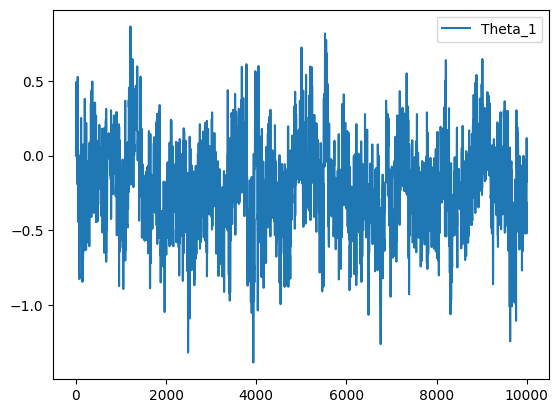

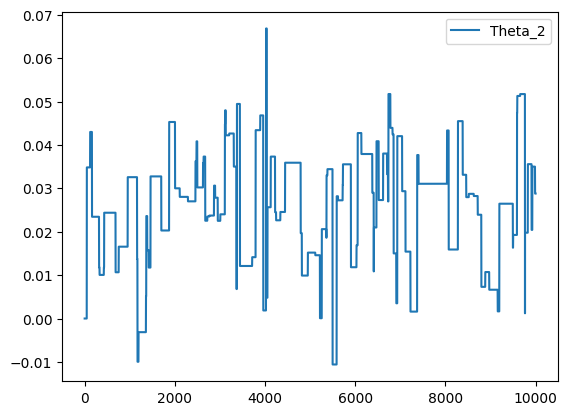

In [15]:
plt.plot(beta_chain[:,0], label="Theta_1")
plt.legend()
plt.show()
plt.plot(beta_chain[:,1], label="Theta_2")
plt.legend()
plt.show()